<a href="https://colab.research.google.com/github/kaushkay/midass-iiitd/blob/master/midass-iiitd/tree/master/CV_Problem/C_V_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
# Loading Dataset.

from zipfile import ZipFile
file_name = 'Vision_task_dataset_public-20190406T201525Z-001.zip'

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print("Done")

Done


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from keras.utils import np_utils
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

In [0]:
train_images = pd.read_pickle('Vision_task_dataset_public/train_image.pkl')
train_labels = pd.read_pickle('Vision_task_dataset_public/train_label.pkl')
test_images = pd.read_pickle('Vision_task_dataset_public/test_image.pkl')

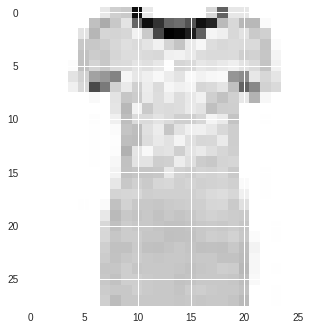

In [134]:
# Plotting the image!

xyz = np.array(train_images)
xyz = np.reshape(xyz, (xyz.shape[0], 28, 28))
plt.imshow(xyz[45])

In [0]:
images = np.array(train_images)
images = np.reshape(images, (images.shape[0], 1, 28, 28))
labels = np.array(train_labels)

In [136]:
images.shape

(8000, 1, 28, 28)

In [137]:
labels.shape

(8000,)

In [138]:
np.unique(labels)

array([0, 2, 3, 6])

In [0]:
labels = np_utils.to_categorical(labels)

In [140]:
labels.shape

(8000, 7)

In [0]:
train_features, val_features, train_labels, val_labels = train_test_split(images, labels, test_size=0.15)

In [142]:
print('train_features shape: ', train_features.shape)
print('val_features shape: ', val_features.shape)
print('train_labels shape: ', train_labels.shape)
print('val_labels shape: ', val_labels.shape)

train_features shape:  (6800, 1, 28, 28)
val_features shape:  (1200, 1, 28, 28)
train_labels shape:  (6800, 7)
val_labels shape:  (1200, 7)


In [0]:
# hyperparameters
epochs = 30
batch_size = 256

In [0]:
# build model
n_classes = 7
model = keras.models.Sequential()


# input layer
model.add(InputLayer(input_shape=(1, 28, 28)))

# normalization
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.convolutional.Conv2D(64, (5, 5), activation='relu',
          bias_initializer='RandomNormal', kernel_initializer='random_uniform',data_format='channels_first'))


model.add(keras.layers.convolutional.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.convolutional.Conv2D(512, (5, 5), activation='relu'))

model.add(keras.layers.convolutional .MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))

model.add(keras.layers.Dropout(0.30))

model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dropout(0.40))

model.add(Dense(64, activation='relu'))

model.add(Dropout(0.5))

model.add(keras.layers.Dense(n_classes, activation='softmax'))

In [0]:
from keras.optimizers import Adam
optimizer = Adam(decay=0.001)

In [0]:
# compile the model
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [147]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_18 (Batc (None, 1, 28, 28)         112       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 64, 24, 24)        1664      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 12, 24)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 8, 512)        307712    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 4, 512)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 28672)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               3670144   
__________

In [119]:
# training
training = model.fit(train_features, train_labels,
                     validation_data=(val_features, val_labels),
                     epochs=epochs,
                     batch_size=batch_size, 
                     verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 6800 samples, validate on 1200 samples
Epoch 1/30
6800/6800 [==============================] - 7s 1ms/step - loss: 1.5569 - acc: 0.3663 - val_loss: 0.9077 - val_acc: 0.6550
Epoch 2/30
6800/6800 [==============================] - 2s 365us/step - loss: 0.9979 - acc: 0.5987 - val_loss: 0.6844 - val_acc: 0.6825
Epoch 3/30
6800/6800 [==============================] - 2s 367us/step - loss: 0.7904 - acc: 0.6762 - val_loss: 0.6282 - val_acc: 0.7167
Epoch 4/30
6800/6800 [==============================] - 2s 367us/step - loss: 0.6994 - acc: 0.7146 - val_loss: 0.5721 - val_acc: 0.7667
Epoch 5/30
6800/6800 [==============================] - 2s 366us/step - loss: 0.6543 - acc: 0.7415 - val_loss: 0.5444 - val_acc: 0.7758
Epoch 6/30
6800/6800 [==============================] - 2s 365us/step - loss: 0.5968 - acc: 0.7684 - val_loss: 0.4953 - val_acc: 0.8050
Epoch 7/30
6800/6800 [==============================] - 2s 366us/step - loss: 0.5511 - acc

In [0]:
test_images = np.array(test_images)

In [149]:
test_images.shape

(2000, 784)

In [0]:
qwe = np.reshape(test_images, (test_images.shape[0], 28, 28))

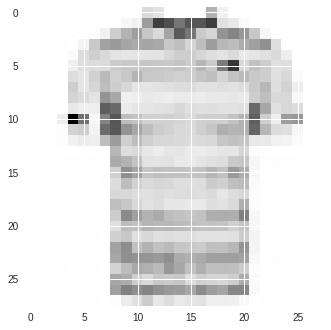

In [152]:
plt.imshow(qwe[2])

In [0]:
test_images = test_images.reshape((test_images.shape[0], 1, 28, 28))

In [155]:
test_images.shape

(2000, 1, 28, 28)

In [0]:
predict = model.predict(test_images)

In [160]:
predict.shape

(2000, 7)

In [0]:
predicted_class = np.argmax(predict, axis=1)

In [0]:
df = pd.DataFrame(data=predicted_class, index = range(test_images.shape[0]))

In [0]:
df.columns=['predicted class']

In [0]:
df.index.name = 'Test_image_index'

In [179]:
df.head()

,predicted class
Test_image_index,
0,6
1,6
2,6
3,6
4,6


In [0]:
df.to_csv('kaushlendra_kumar_giri.csv')